In [46]:
# These are all the python libraries you'll need

import numpy as np # numpy for making arrays and doing math on them
import pandas as pd # pandas for importing spreadsheet data and manipulating it
import scipy as sp # scipy for solving equations
import matplotlib as mpl # matplotlib for graphing
import matplotlib.pyplot as plt # the pyplot functions from mathplotlib as plt
import math # math for things like constants (e or pi) and some simple math
fc = '\033[91m'
warnc = '\033[93m'
endc = '\033[0m'
figsize=(7.5,5)
fontsize=20

This homework focuses on the model of gene expression we learned in lecture. We'll take a look at a constitutively expressed gene, followed by a self-repressed version of the same gene.

***Problem 1. Constitutive expression.***

A gene is constitutively expressed in a bacterial cell, meaning that no transcription factors activate or repress it. The synthesis rate of the gene will depend primarily on the affinity of RNA polyermase for the promoter and ribosomes for the mRNA's ribosome-biding site. The equation below describes the production and degradation of the protein for this gene, where $P$ is concentration in units of protein molecules per cell:

<br /><center>\begin{equation}\frac{dP}{dt} = \alpha_{synth}-k_{dil}P\end{equation}

$\alpha_{synth}$ is the synthesis rate already taking into account mRNA synthesis and degradation (see lecture 15). $k_{dil}$ is the dilution rate set by cell doubling time in units of 1/hours.
    
For this problem, use
    
$\alpha_{synth} = 6000$<br />
$k_{dil} = 0.833$<br />

**Problem 1(a). Describe what the three terms in the equation represent biologically.**

<font color='red'>
    The term on the LHS will be the net rate of change in a localised concentration of the protein P. The term $\alpha_{synth}$ represents the net gain in concentration for this protein due to production, while $-k_{dil}P$ represents the net loss due to diffusion into the media.

**Problem 1(b). Given that $P$ is in units of molecules per cell and $k_{dil}$ is in units of 1/hours, what are the units of $\alpha_{synth}$? How many proteins per second does this cell synthesize?**

<font color='red'>
    $[k_{dil}P]=[\alpha_{synth}]=\frac{molecules}{hour \cdot cell} \\$
    
    
<font color='red'>
    $[molecules]\equiv[proteins]\\$
    $\therefore (1 \ cell)\cdot\alpha_{synth} = 6000 \frac{proteins}{hour} = \frac{6000}{3600} \frac{proteins}{second} = 1.67 \frac{proteins}{second}$ 

**Problem 1(c). Plot the rate of change of protein concentration as a function of the protein concentration from $P = 0$ molecules per cell to $P = 10,000$ molecules per cell.**

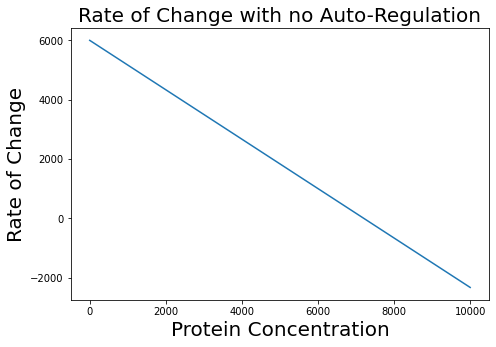

In [2]:
alpha=6e3
k=.833

def dpdt(p):
    return alpha - k*p

p=np.linspace(0,1e4)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(p,dpdt(p));
ax.set_ylabel("Rate of Change",fontsize=fontsize)
ax.set_xlabel("Protein Concentration",fontsize=fontsize)
ax.set_title('Rate of Change with no Auto-Regulation',fontsize=fontsize);

**Problem 1(d). From your graph above, estimate the steady-state concentration of proteins for this gene in this cell.**

<font color='red'>
$\frac{\partial P}{\partial t} =0 \implies P = \frac{\alpha_{synth}}{k_{dil}}$

In [3]:
print(fc+'Steady State Concentration: P ~',"{:.2f}".format(alpha/k),"[molecules/cell]"+endc)

Steady State Concentration: P ~ 7202.88 [molecules/cell]


***Problem 2. Self-repression.***

Now let's consider a gene that has the same synthesis and dilution rate as Problem 1, but now represses itself. The equation describing protein concentration for this gene looks like this (see lectures 15 and 14 for more):
<br /><center>\begin{equation}\frac{dP}{dt} = \alpha_{synth}\frac{1+b(\frac{P}{K})^n}{1+(\frac{P}{K})^n}-k_{dil}P\end{equation}
    
Use these parameter values for this problem:

$\alpha_{synth} = 6000$<br />
$k_{dil} = 0.833$<br />
$K = 200$<br />
$n = 3$<br />
$b = 0.1$<br />
    
**Problem 2(a). The first term on the right is now different. What does that term represent biologically?**

<font color='red'>
The first term now encapsulates a system with a self-repressive behaviour. It modulates the maximum synthesis rate $\alpha_{synth}$ according to the current population, according to the parameters b and K. Here b represents the relative transcription rate, and K characterizes the strength of the repressing protein's bond to the DNA strand. 

**Problem 2(b). What does the parameter $K$ correspond to?**

<font color='red'>
    The K parameter encodes how preferentially the repressive proteins will bond to the strand. A higher K will correspond to a higher preference for bonding.

**Problem 2(c). Plot just the synthesis term (first term on the right in the equation) as a function of the protein concentration from 0 molecules per cell up to 1500 molecules per cell (the numpy functions np.divide and np.power may be useful here). As always, label your axes!!**

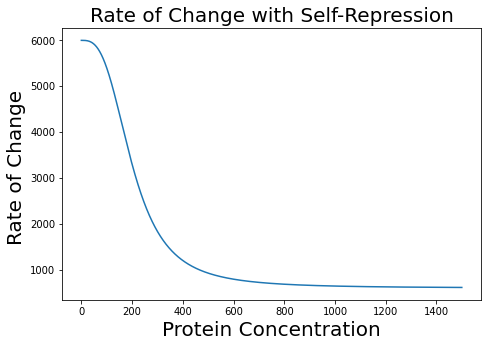

In [39]:
alpha=6e3
kd=.833
K=200
n=3
b=.1

def dpdt(p,n=n):
    return alpha*((1+b*(p/K)**n)/(1+(p/K)**n))

p=np.linspace(0,1.5e3,100000)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(p,dpdt(p,n=3));
ax.set_ylabel("Rate of Change ",fontsize=fontsize)
ax.set_xlabel("Protein Concentration",fontsize=fontsize)
ax.set_title('Rate of Change with Self-Repression',fontsize=fontsize);

**Problem 2(d). The curve you see in 2(b) is called a Hill function and is used often in biochemistry to model switch-like responses to changes in concentration. What would happen to the curve if we reduced $n$? What if we increased $n$? What do those situations correspond to biologically in terms of the expression of this gene?**

<font color='red'>
    The parameter n influences how fast the switch between initial (max) and final (min) transcription rates happens. A smaller n would correspond to a more gentle slope, a larger n to a steeper slope. (See below.) The switch slope correlates to how soon we see a gene response, so a higher n means a faster gene-expression response and vice-versa.

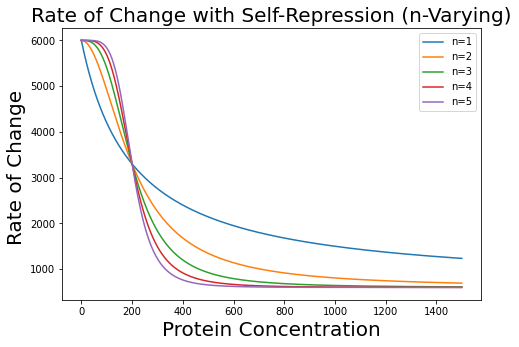

In [40]:
fig, ax = plt.subplots(figsize=figsize)
for i in list(range(1,6,1)):
    ax.plot(p,dpdt(p,n=i),label ="n={}".format(i));

ax.set_ylabel("Rate of Change ",fontsize=fontsize)
ax.set_xlabel("Protein Concentration",fontsize=fontsize)
ax.set_title('Rate of Change with Self-Repression (n-Varying)',fontsize=fontsize);
ax.legend();

**Problem 2(e). Use a graphical method to estimate the steady-state protein concentration for this gene in the self-repressed scenario.**

If you don't remember, this was done in lecture 15. Plot the synthesis term as in 2(b), but separately also plot the negative of the dilution term on the same graph. When these two quantities are equal, the derivative of protein concetration will be zero (i.e. a steady state).

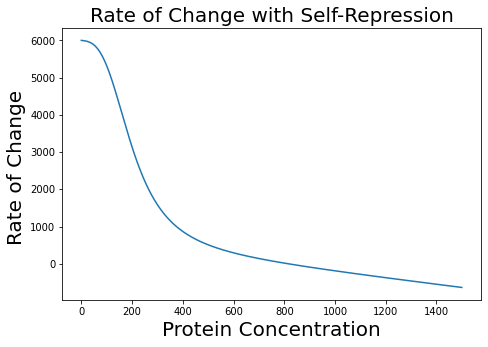

In [41]:
alpha=6e3
kd=.833
K=200
n=3
b=.1

def dpdt(p,n=3):
    return alpha*((1+b*(p/K)**n)/(1+(p/K)**n)) -kd*p

p=np.linspace(0,1.5e3,100000)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(p,dpdt(p,n=3));
ax.set_ylabel("Rate of Change ",fontsize=fontsize)
ax.set_xlabel("Protein Concentration",fontsize=fontsize)
ax.set_title('Rate of Change with Self-Repression',fontsize=fontsize);

In [42]:
rate = dpdt(p,n=3)
zero_idx = (np.abs(rate-0)).argmin()

# print(zero_idx,p[zero_idx],rate[zero_idx])
print(fc+'Steady State Concentration: P ~',"{:.2f}".format(p[zero_idx]),"[molecules/cell]"+endc)

Steady State Concentration: P ~ 814.78 [molecules/cell]


**Problem 2(f). How does this compare to the steady-state concentration for constitutive expression?**

<font color='red'>
    The result for constitutive expression was $P\approx7000$, versus $P\approx800$ with self-repression. Thus the steady state concentration is almost an order of magnitude smaller than in the case with no repression, as we would expect.

**Problem 2(g). If we increased K, how would the answer to 2(d) change? What if we decreased K?**

<font color='red'>
    The parameter K predominantly influences what the steady state population will be. If we increased K, the steady state protein concentration would be higher. Similarly if we decreased K, the concentration would be lower. (See Below)

**Problem 2(h). To check your intuition for 2(g), let's actually plot it. Below, make a graph like 2(e), except, in addition to the original Hill function synthesis term, include two others, one where $K = 100$ and one where $K = 1000$.**

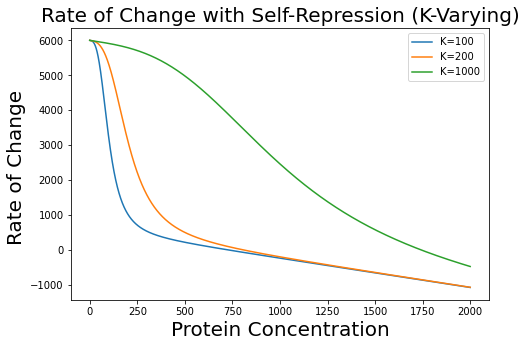

In [44]:
alpha=6e3
kd=.833
K_list=[100,200,1000]
n=3
b=.1

def dpdt(p,n=3,K=200):
    return alpha*((1+b*(p/K)**n)/(1+(p/K)**n)) -kd*p

p=np.linspace(0,2.0e3,100000)
fig, ax = plt.subplots(figsize=figsize)
for i in K_list:
    ax.plot(p,dpdt(p,n=3,K=i),label ="K={}".format(i));
ax.set_ylabel("Rate of Change ",fontsize=fontsize)
ax.set_xlabel("Protein Concentration",fontsize=fontsize)
ax.set_title('Rate of Change with Self-Repression (K-Varying)',fontsize=fontsize);
ax.legend();


**Problem 2(i). What are the steady-state protein concentrations for each value of $K$?**

In [45]:
for i in K_list:
    rate = dpdt(p,n=3,K=i)
    zero_idx = (np.abs(rate-0)).argmin()
    print(fc+"Steady State Concentration (K={}): P ~".format(i),"{:.2f}".format(p[zero_idx]),"[molecules/cell]"+endc)

Steady State Concentration (K=100): P ~ 736.47 [molecules/cell]
Steady State Concentration (K=200): P ~ 814.77 [molecules/cell]
Steady State Concentration (K=1000): P ~ 1745.84 [molecules/cell]
